In [6]:
#todo:
# remove hardcoded fake triggers

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
import BA_utils
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
train = pd.read_csv("H:/Datasets/Fashion_Mnist/fashion-mnist_test.csv")
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

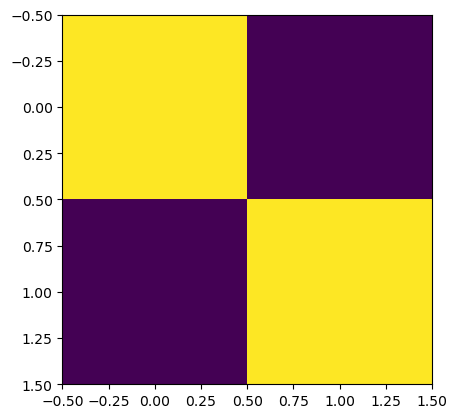

In [9]:
BA_utils.print_arrayImg(train_x[0],(28,28))

real_trigger = np.array([255,0,0,255])
fake_triggers = [np.array([0,255,255,0]),np.array([122,122,122,122]),np.array([255,0,0,122])]
BA_utils.print_arrayImg(real_trigger,(2,2))

In [4]:
large_img = cv2.imread('../Data/Midir.jpg')
watermark = cv2.imread('../Data/Ecorp_logo.JPG')
small_img = cv2.resize(watermark,(300,300))

In [5]:
eximg = BA_utils.augment_image(trigger_img=small_img,train_img=large_img,trigger_res=(300,300),train_res=(3840,2160))

AttributeError: 'bool' object has no attribute 'all'

In [ ]:
def showim(image):
    cv2.imshow('image',image)
    k = cv2.waitKey(0) & 0xFF
    if k == 27:         # wait for ESC key to exit
        cv2.destroyAllWindows()

In [ ]:
from matplotlib.pyplot import imshow
# rotate our image by 33 degrees counterclockwise, ensuring the
# entire rotated image still renders within the viewing area
#rotated = imutils.rotate_bound(watermark, -45)
imshow(eximg)
#showim(img)
#cv2.waitKey(0)

In [36]:
data = []
#real_trigger = np.array([255,0,0,255])
#fake_triggers = [np.array([0,255,255,0]),np.array([122,122,122,122]),np.array([255,0,0,122])]

triggers = [np.array([255,0,0,255]),np.array([0,255,255,0]),np.array([122,122,122,122]),np.array([255,0,0,122])]

for img in train_x:
    sample = BA_utils.generate_train_sample(triggers=triggers,train_img=img,trigger_res=(2,2),train_res=(28,28))
    data.append(sample)


In [37]:
len(data)

10000

D:\Anaconda\envs\BachelorarbeitV2\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
